<a href="https://colab.research.google.com/github/manoharsambandam/Project-1/blob/master/EVA_S1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# import the necessary packages
import numpy as np
from urllib.request import urlopen
import cv2
from matplotlib import pyplot as plt

# METHOD #1: OpenCV, NumPy, and urllib
def url_to_image(url):
	# download the image, convert it to a NumPy array, and then read
	# it into OpenCV format
	resp = urlopen(url)
	image = np.asarray(bytearray(resp.read()), dtype="uint8")
	image = cv2.imdecode(image, cv2.IMREAD_COLOR)
 
	# return the image
	return image

In [0]:
image = url_to_image("https://fontsarena-cd5e.kxcdn.com/wp-content/uploads/2019/04/helvetica-now-font-400x364.png")

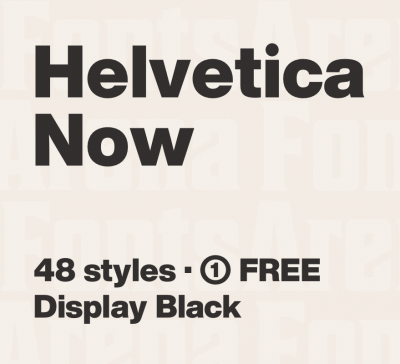

In [4]:
from google.colab.patches import cv2_imshow
cv2_imshow(image)

In [0]:
edges = cv2.Canny(image,100,200)

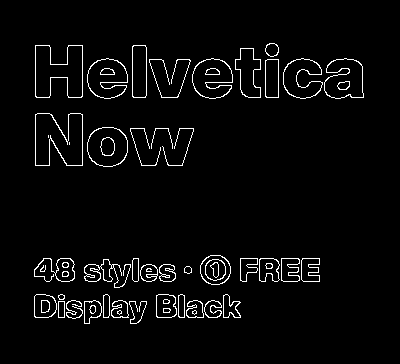

In [6]:
cv2_imshow(edges)

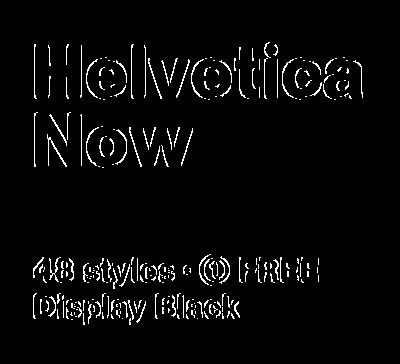

In [24]:
#kernel = np.ones((3,3),np.float32)/25
kernel = np.float32([[-1,0,1],[-1,0,1],[-1,0,1]])

dst = cv2.filter2D(edges,-1,kernel)
cv2_imshow(dst)

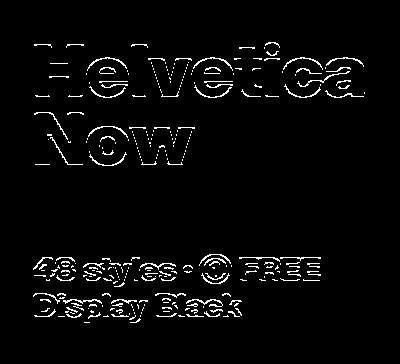

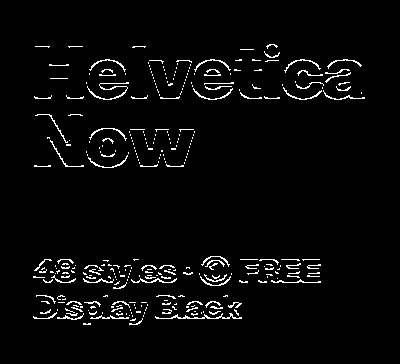

In [25]:
HorizontalEdgeFilter1 = np.float32([[-1,-1,-1],[0,0,0],[1,1,1]])
HorizontalFiltered_1 = cv2.filter2D(edges,-1,HorizontalEdgeFilter)
cv2_imshow(HorizontalFiltered_1)
#HorizontalEdgeFilter2 = np.float32([[1,1,1],[0,0,0],[-1,-1,-1]])
#HorizontalFiltered_2 = cv2.filter2D(edges,-1,HorizontalEdgeFilter2)
#cv2_imshow(HorizontalFiltered_2)


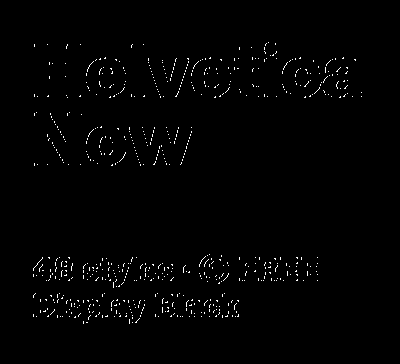

In [36]:
FortyFiveDegreeFilter = np.float32([[-1,-1,0],[-1,0,1],[0,1,1]])
FortyFiveDegreeFilterImage = cv2.filter2D(edges,-1,FortyFiveDegreeFilter)
#cv2_imshow(FortyFiveDegreeFilterImage)
VerticalEdgeFilter = np.float32([[-1,0,1],[-1,0,1],[-1,0,1]])
VerticalEdgeFilteredImage = cv2.filter2D(FortyFiveDegreeFilterImage,-1,VerticalEdgeFilter)
#cv2_imshow(dst)
img1_bg = cv2.bitwise_and(FortyFiveDegreeFilterImage,VerticalEdgeFilteredImage)
cv2_imshow(img1_bg)

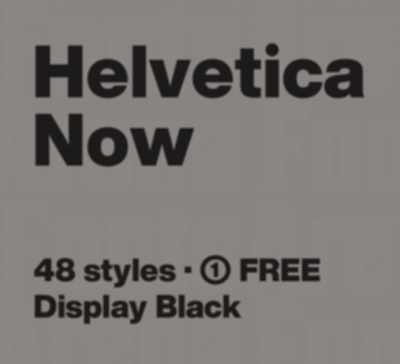

In [44]:
##BLUR FILTER . Simply multiply the existing value by 1/16. Expecting sharp edge to become blurred
BlurFilter = (1/16) * np.float32([[1,1,1],[1,1,1],[1,1,1]])
BlurFilteredImage = cv2.filter2D(image,-1,BlurFilter)
cv2_imshow(BlurFilteredImage)


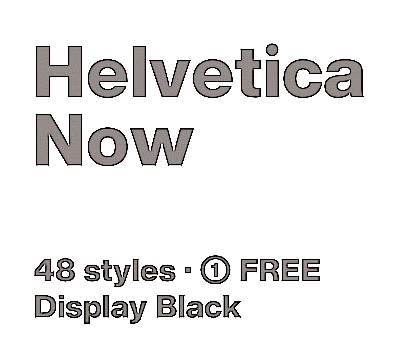

In [56]:
#Sharpen KERNEL ; Edges should be sharpened. This is essentially a high pass filter
#---Sharpening filter----
SharpenKernel = np.float32([[-1,-1,-1], [-1,11,-1], [-1,-1,-1]])
SharpennedImage = cv2.filter2D(image, -1, SharpenKernel)
cv2_imshow(SharpennedImage)

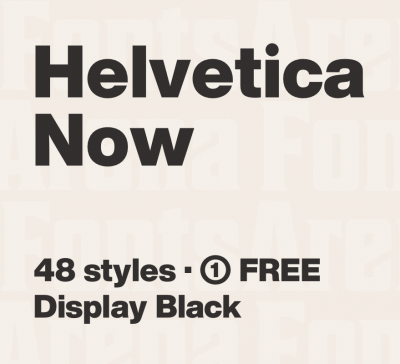

In [62]:
#identity Function
IdentityKernel = np.float32([[0,0,0], [0,1,0], [0,0,0]])
IdentityImage = cv2.filter2D(image, -1, IdentityKernel)
cv2_imshow(IdentityImage)
